In [175]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
import spacy

In [223]:
nlp = spacy.load("en_core_web_sm")

In [224]:
#load preprocessed data
preprocessed_data = pd.read_csv('Ukraine_before_conflict_preprocessed.csv')
preprocessed_data.head()

,article_title,author,published_time,article_text
0,Ukrainian president expects no conflict with R...,By Xinhua,"Published: Feb 23, 2022 09:34 AM",Ukraine President Volodymyr Zelensky attends a...
1,British PM announces sanctions against Russia ...,By Xinhua,"Published: Feb 23, 2022 09:37 AM",UK Prime Minister Boris Johnson Photo: VCG UK ...
2,NATO chief urges Russia to choose diplomacy in...,By Xinhua,"Published: Feb 23, 2022 09:41 AM",NATO Secretary General Jens Stoltenberg speaks...
3,"EU agrees Russia sanctions package, warns of f...",By Xinhua,"Published: Feb 23, 2022 09:42 AM",EU Commission President Ursula von der Leyen m...
4,Russia's upper house approves use of military ...,By Xinhua,"Published: Feb 23, 2022 09:48 AM",Russia President Vladimir Putin signs document...


In [225]:
#load top 50 words for each entity type from the NER results
ner_results = pd.read_excel('Ukraine_before_conflict_TopWords.xlsx')
ner_results.head()

,Entity Type,Word,Count
0,LOC,US,895
1,LOC,Russia,782
2,LOC,China,721
3,LOC,Ukraine,520
4,LOC,West,112


In [226]:
#filtering top 10 entities for each type
top_5 = ner_results.groupby('Entity Type').head(5)
top_5.head()

,Entity Type,Word,Count
0,LOC,US,895
1,LOC,Russia,782
2,LOC,China,721
3,LOC,Ukraine,520
4,LOC,West,112


In [227]:
#combine top 10 into single list of entities
entities = top_5['Word'].tolist()
entities

['US',
 'Russia',
 'China',
 'Ukraine',
 'West',
 'Vladimir Putin',
 'Joe Biden',
 'Antony Blinken',
 'Wang Yi',
 'Xi Jinping',
 'EU',
 'NATO',
 'UN',
 'Global Times',
 'Xinhua',
 'Winter Olympic Games',
 'West',
 '19',
 'Beijing Winter Olympic Games',
 'COVID']

## Relationship with co-occurence based in same sentence using networkx

In [228]:
#initiliazise graph
G = nx.Graph()

#add nodes for each entity
for entity in entities:
    G.add_node(entity)

In [229]:
co_occurrence = defaultdict(int)

In [230]:
for article in preprocessed_data['article_text']:
    #process the article with SpaCy to get sentences
    doc = nlp(article)
    sentences = [sent.text for sent in doc.sents]
    #print(sentences)
    
    #iterate through each sentence in the article
    for sentence in sentences:
        present_entities = [entity for entity in entities if entity in sentence]
        #print(present_entities)
        for i in range(len(present_entities)):
            for j in range(i + 1, len(present_entities)):
                co_occurrence[(present_entities[i], present_entities[j])] += 1
                #print(co_occurrence)

In [231]:
#add edges with weights to the graph
for (entity1, entity2), weight in co_occurrence.items():
    G.add_edge(entity1, entity2, weight=weight)

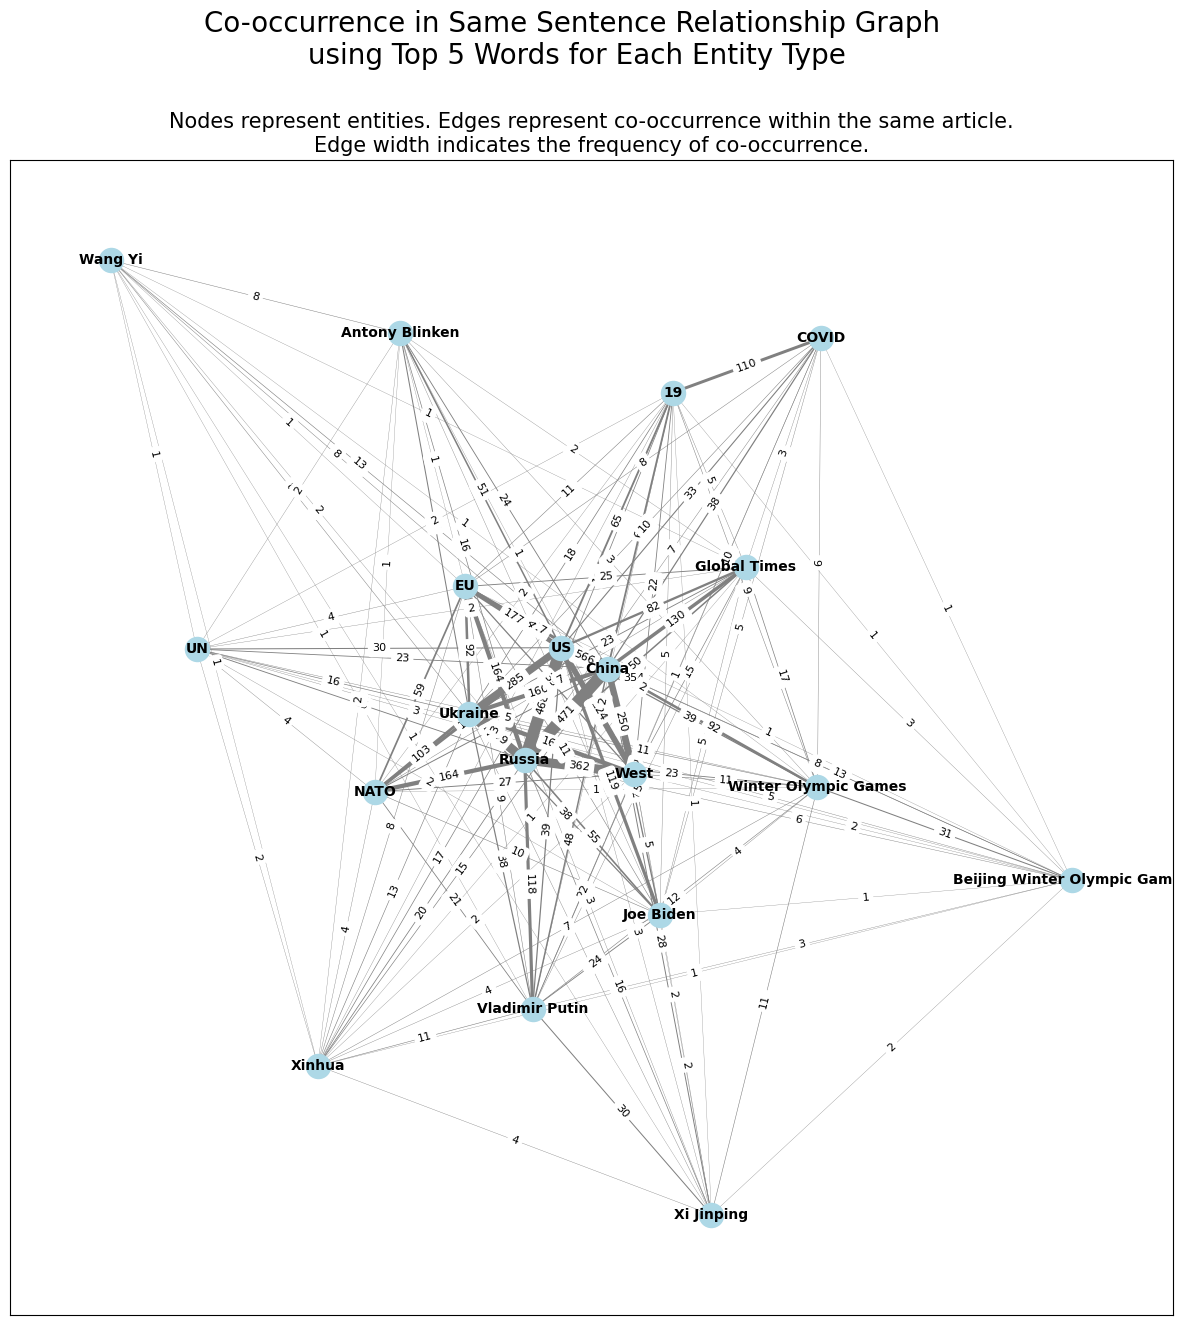

In [233]:
#draw the graph
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G)
edges = G.edges(data=True)
weights = [edge[2]['weight'] for edge in edges]

max_weight = max(weights)
min_width = 0.2
normalized_weights = [(weight / max_weight * 10) + min_width for weight in weights]

nx.draw_networkx_nodes(G, pos, node_size=300, node_color='lightblue')
nx.draw_networkx_edges(G, pos, edgelist=edges, width=normalized_weights, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')
#nx.draw(G, pos, with_labels=True, node_size=300, node_color='lightblue', edge_color='gray', font_size=10, font_weight='bold', width=weights)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=8)

plt.suptitle("Co-occurrence in Same Sentence Relationship Graph\n using Top 5 Words for Each Entity Type", fontsize=20)
plt.title("Nodes represent entities. Edges represent co-occurrence within the same article.\nEdge width indicates the frequency of co-occurrence.", fontsize=15)
plt.show()

In [40]:
#edges

---
## Relationship with co-occurence based in same article using networkx

In [234]:
#initialize graph
G = nx.Graph()

#add nodes for each entity
for entity in entities:
    G.add_node(entity)

In [235]:
co_occurrence = defaultdict(int)

#iterate through each article in the preprocessed dataset
for article in preprocessed_data['article_text']:
    #find all entities present in the article
    present_entities = [entity for entity in entities if entity in article]
    #print(present_entities)
    
    #track co-occurrences within the article
    for i in range(len(present_entities)):
        for j in range(i + 1, len(present_entities)):
            co_occurrence[(present_entities[i], present_entities[j])] += 1
            #print(co_occurrence)

In [236]:
#add edges with weights to the graph
for (entity1, entity2), weight in co_occurrence.items():
    G.add_edge(entity1, entity2, weight=weight)

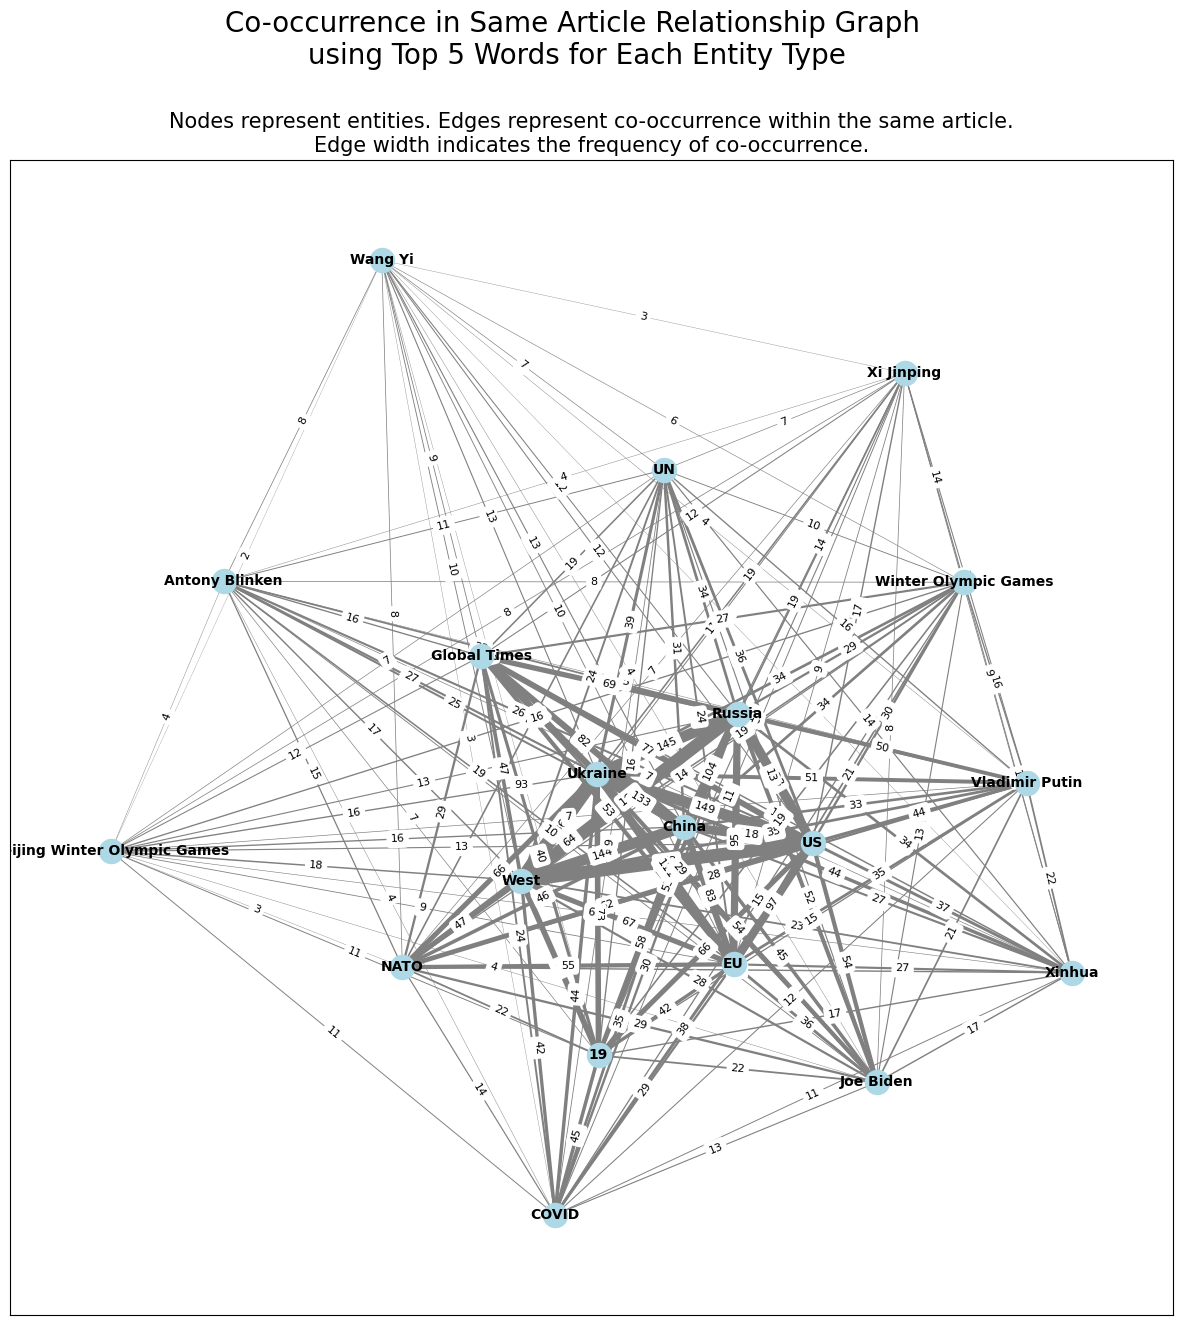

In [238]:
#draw the graph
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G)
edges = G.edges(data=True)
weights = [edge[2]['weight'] for edge in edges]

max_weight = max(weights)
min_width = 0.1
normalized_weights = [(weight / max_weight * 10) + min_width for weight in weights]

nx.draw_networkx_nodes(G, pos, node_size=300, node_color='lightblue')
nx.draw_networkx_edges(G, pos, edgelist=edges, width=normalized_weights, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')
#nx.draw(G, pos, with_labels=True, node_size=300, node_color='lightblue', edge_color='gray', font_size=10, font_weight='bold', width=weights)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=8)

plt.suptitle("Co-occurrence in Same Article Relationship Graph\n using Top 5 Words for Each Entity Type", fontsize=20)
plt.title("Nodes represent entities. Edges represent co-occurrence within the same article.\nEdge width indicates the frequency of co-occurrence.", fontsize=15)
plt.show()

---
## Relationship with co-occurence based in same sentence using hypergraph

In [121]:
pip install hypernetx

Note: you may need to restart the kernel to use updated packages.


In [210]:
import hypernetx as hnx
import matplotlib.pyplot as plt

In [211]:
entities = list(set(entity.lower() for entity in entities_of_interest))
entities

['ukraine',
 'xinhua',
 'un',
 'covid',
 'west',
 'eu',
 'russia',
 'china',
 'vladimir putin',
 'beijing winter olympic games',
 'us',
 'wang yi',
 '19',
 'winter olympic games',
 'global times',
 'antony blinken',
 'joe biden',
 'xi jinping',
 'nato']

In [212]:
#function to find co-occurrences within sentences
def find_cooccurrences(text, entities):
    doc = nlp(text)
    co_occurrences = []
    
    for sent in doc.sents:
        sent_entities = [entity for entity in entities if entity in sent.text.lower()]
        if len(sent_entities) > 1:
            co_occurrences.append(tuple(sent_entities))
    
    return co_occurrences

In [213]:
hyperedges = []

for article in preprocessed_data['article_text']:
    co_occurrences = find_cooccurrences(article, entities)
    hyperedges.extend(co_occurrences)

In [214]:
hyperedges

[('ukraine', 'xinhua', 'russia', 'vladimir putin', 'us'),
 ('ukraine', 'russia', 'us'),
 ('russia', 'us'),
 ('russia', 'vladimir putin', 'us'),
 ('russia', 'vladimir putin', 'us'),
 ('ukraine', 'un', 'russia', 'us'),
 ('russia', 'vladimir putin', 'us'),
 ('un', 'russia', 'us'),
 ('eu', 'us'),
 ('russia', 'us'),
 ('ukraine', 'west', 'russia', 'vladimir putin', 'us'),
 ('ukraine', 'us', 'nato'),
 ('ukraine', 'xinhua', 'russia', 'us', 'nato'),
 ('ukraine', 'russia', 'us', 'nato'),
 ('ukraine', 'eu', 'us', 'nato'),
 ('us', 'nato'),
 ('russia', 'us'),
 ('un', 'nato'),
 ('ukraine', 'russia', 'us'),
 ('russia', 'vladimir putin', 'us'),
 ('eu', 'vladimir putin', 'us', 'nato'),
 ('ukraine', 'russia', 'us', 'nato'),
 ('ukraine', 'eu', 'us'),
 ('xinhua', 'eu', 'russia', 'us'),
 ('ukraine', 'eu', 'russia', 'us'),
 ('ukraine', 'russia', 'us'),
 ('eu', 'russia', 'us'),
 ('ukraine', 'russia', 'vladimir putin', 'us'),
 ('russia', 'us', 'nato'),
 ('un', 'eu', 'russia', 'us'),
 ('ukraine', 'un', 'eu'),


In [215]:
#remove duplicate hyperedges
#hyperedges = list(map(list, set(map(tuple, hyperedges))))
#hyperedges

In [216]:
#count the frequency of each hyperedge
hyperedge_counter = Counter(map(tuple, hyperedges))
hyperedge_counter

Counter({('ukraine', 'xinhua', 'russia', 'vladimir putin', 'us'): 1,
         ('ukraine', 'russia', 'us'): 61,
         ('russia', 'us'): 147,
         ('russia', 'vladimir putin', 'us'): 23,
         ('ukraine', 'un', 'russia', 'us'): 37,
         ('un', 'russia', 'us'): 85,
         ('eu', 'us'): 57,
         ('ukraine', 'west', 'russia', 'vladimir putin', 'us'): 4,
         ('ukraine', 'us', 'nato'): 8,
         ('ukraine', 'xinhua', 'russia', 'us', 'nato'): 1,
         ('ukraine', 'russia', 'us', 'nato'): 28,
         ('ukraine', 'eu', 'us', 'nato'): 1,
         ('us', 'nato'): 9,
         ('un', 'nato'): 4,
         ('eu', 'vladimir putin', 'us', 'nato'): 1,
         ('ukraine', 'eu', 'us'): 12,
         ('xinhua', 'eu', 'russia', 'us'): 1,
         ('ukraine', 'eu', 'russia', 'us'): 20,
         ('eu', 'russia', 'us'): 31,
         ('ukraine', 'russia', 'vladimir putin', 'us'): 5,
         ('russia', 'us', 'nato'): 28,
         ('un', 'eu', 'russia', 'us'): 21,
         ('ukraine

In [217]:
filtered_hyperedges = [list(edge) for edge, count in hyperedge_counter.items() if count > 15]
filtered_hyperedges

[['ukraine', 'russia', 'us'],
 ['russia', 'us'],
 ['russia', 'vladimir putin', 'us'],
 ['ukraine', 'un', 'russia', 'us'],
 ['un', 'russia', 'us'],
 ['eu', 'us'],
 ['ukraine', 'russia', 'us', 'nato'],
 ['ukraine', 'eu', 'russia', 'us'],
 ['eu', 'russia', 'us'],
 ['russia', 'us', 'nato'],
 ['un', 'eu', 'russia', 'us'],
 ['un', 'us'],
 ['ukraine', 'un'],
 ['ukraine', 'us'],
 ['west', 'russia', 'us'],
 ['un', 'russia', 'us', 'nato'],
 ['un', 'china'],
 ['un', 'west'],
 ['west', 'us'],
 ['ukraine', 'un', 'us'],
 ['un', 'eu', 'us'],
 ['china', 'us'],
 ['un', 'china', 'us'],
 ['ukraine', 'russia', 'china', 'us'],
 ['russia', 'china', 'us'],
 ['un', 'west', 'russia', 'us'],
 ['un', 'russia', 'china', 'us'],
 ['ukraine', 'china'],
 ['un', 'west', 'us'],
 ['ukraine', 'un', 'west', 'russia', 'us'],
 ['un', 'china', 'us', 'global times'],
 ['un', 'eu'],
 ['un', 'us', 'global times'],
 ['eu', 'china'],
 ['un', 'global times'],
 ['us', 'joe biden'],
 ['un', 'west', 'russia', 'china', 'us'],
 ['un', 

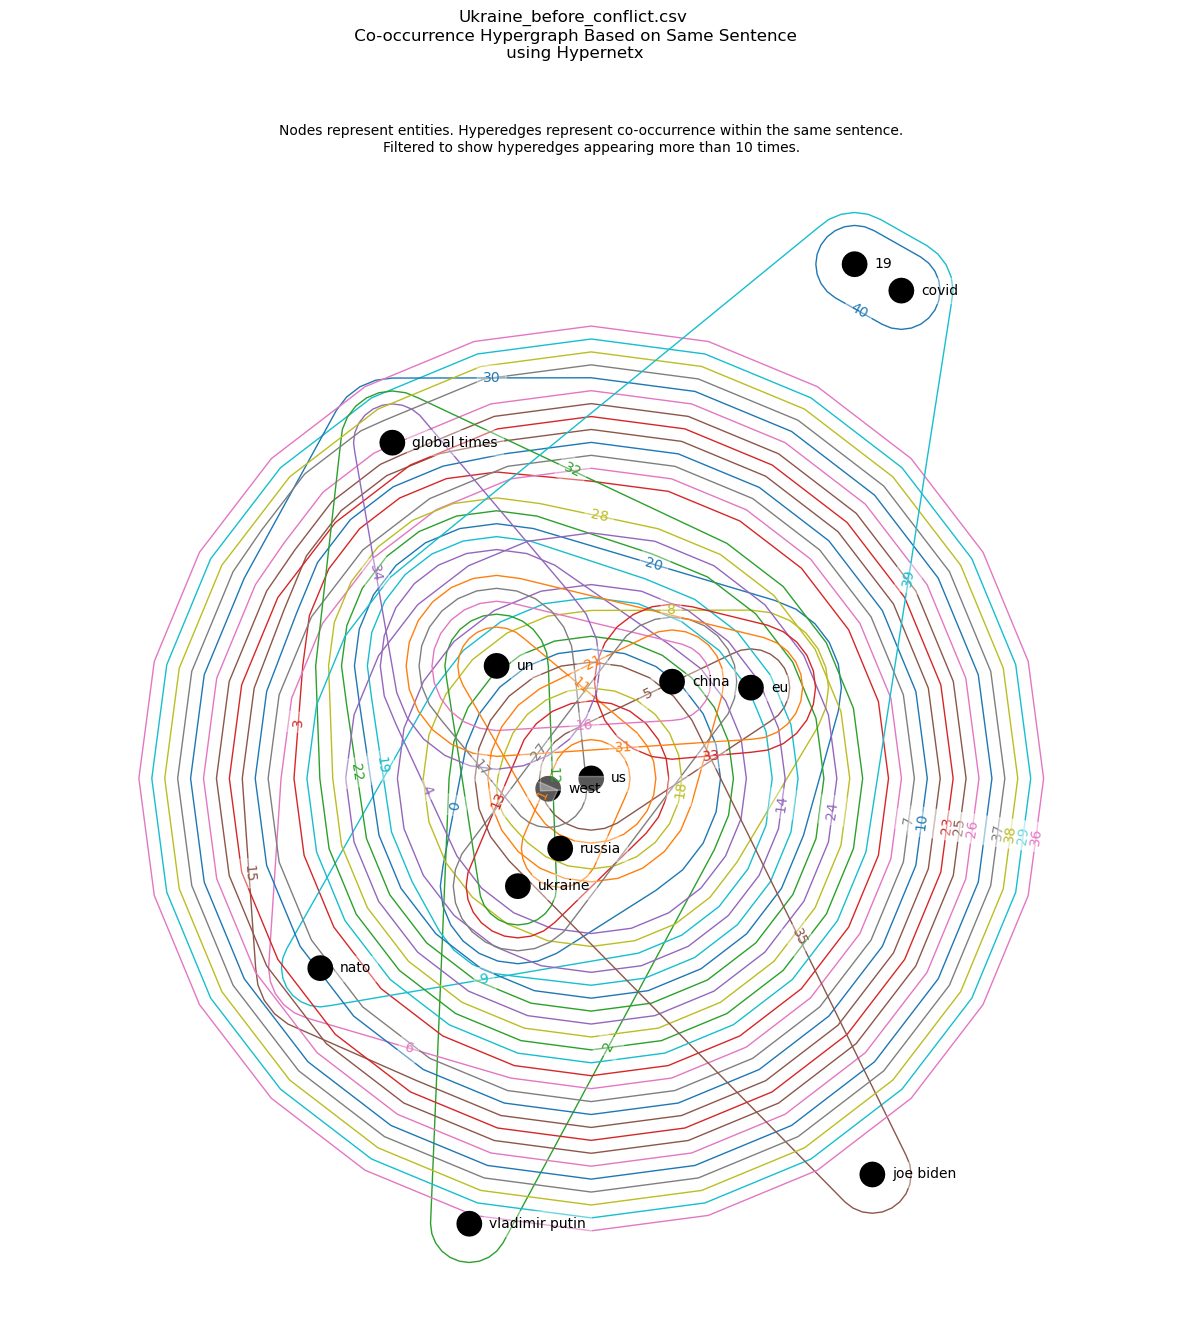

In [218]:
H = hnx.Hypergraph(filtered_hyperedges)

plt.figure(figsize=(15, 15))
hnx.draw(H, with_node_labels=True, with_edge_labels=True)
plt.suptitle("Ukraine_before_conflict.csv\n Co-occurrence Hypergraph Based on Same Sentence\n using Hypernetx")
plt.title("Nodes represent entities. Hyperedges represent co-occurrence within the same sentence.\nFiltered to show hyperedges appearing more than 10 times.", fontsize=10)
plt.show()

---
## Relationship with co-occurence based in same article using hypergraph

In [204]:
def find_cooccurrences(text, entities):
    doc = nlp(text)
    doc_text = doc.text.lower()
    co_occurrences = []
    
    article_entities = [entity for entity in entities if entity in doc_text]
    if len(article_entities) > 1:
        co_occurrences.append(tuple(article_entities))
    
    return co_occurrences

In [205]:
hyperedges = []

for article in preprocessed_data['article_text']:
    co_occurrences = find_cooccurrences(article, entities)
    hyperedges.extend(co_occurrences)

In [206]:
hyperedges

[('ukraine', 'xinhua', 'russia', 'vladimir putin', 'us'),
 ('ukraine', 'un', 'west', 'eu', 'russia', 'vladimir putin', 'us'),
 ('ukraine', 'xinhua', 'un', 'eu', 'russia', 'vladimir putin', 'us', 'nato'),
 ('ukraine',
  'xinhua',
  'un',
  'eu',
  'russia',
  'vladimir putin',
  'us',
  'joe biden',
  'nato'),
 ('ukraine', 'xinhua', 'un', 'russia', 'vladimir putin', 'us', 'nato'),
 ('ukraine',
  'xinhua',
  'un',
  'west',
  'eu',
  'russia',
  'vladimir putin',
  'us',
  'antony blinken',
  'joe biden',
  'nato'),
 ('ukraine', 'un', 'west', 'china', 'us', 'global times'),
 ('ukraine',
  'un',
  'covid',
  'west',
  'eu',
  'russia',
  'china',
  'us',
  '19',
  'joe biden',
  'nato'),
 ('ukraine', 'un', 'west', 'russia', 'china', 'us', '19'),
 ('ukraine', 'xinhua', 'un', 'us'),
 ('ukraine',
  'un',
  'west',
  'eu',
  'russia',
  'china',
  'vladimir putin',
  'us',
  'nato'),
 ('ukraine', 'un', 'west', 'eu', 'china', 'us', 'global times'),
 ('ukraine',
  'xinhua',
  'un',
  'west',
  

In [207]:
hyperedge_counter = Counter(map(tuple, hyperedges))
hyperedge_counter

Counter({('ukraine', 'xinhua', 'russia', 'vladimir putin', 'us'): 1,
         ('ukraine', 'un', 'west', 'eu', 'russia', 'vladimir putin', 'us'): 1,
         ('ukraine',
          'xinhua',
          'un',
          'eu',
          'russia',
          'vladimir putin',
          'us',
          'nato'): 1,
         ('ukraine',
          'xinhua',
          'un',
          'eu',
          'russia',
          'vladimir putin',
          'us',
          'joe biden',
          'nato'): 1,
         ('ukraine',
          'xinhua',
          'un',
          'russia',
          'vladimir putin',
          'us',
          'nato'): 1,
         ('ukraine',
          'xinhua',
          'un',
          'west',
          'eu',
          'russia',
          'vladimir putin',
          'us',
          'antony blinken',
          'joe biden',
          'nato'): 1,
         ('ukraine', 'un', 'west', 'china', 'us', 'global times'): 1,
         ('ukraine',
          'un',
          'covid',
          'wes

In [208]:
filtered_hyperedges = [list(edge) for edge, count in hyperedge_counter.items() if count > 1]
filtered_hyperedges

[['ukraine', 'xinhua', 'un', 'us'],
 ['ukraine',
  'xinhua',
  'un',
  'west',
  'eu',
  'russia',
  'vladimir putin',
  'us',
  'nato'],
 ['ukraine', 'un', 'west', 'eu', 'russia', 'china', 'us', 'global times'],
 ['ukraine', 'un', 'covid', 'eu', 'russia', 'us', '19'],
 ['ukraine',
  'un',
  'west',
  'eu',
  'russia',
  'china',
  'us',
  'wang yi',
  'antony blinken'],
 ['ukraine',
  'un',
  'west',
  'eu',
  'russia',
  'china',
  'vladimir putin',
  'us',
  'global times'],
 ['ukraine',
  'un',
  'covid',
  'eu',
  'russia',
  'china',
  'us',
  '19',
  'global times',
  'joe biden',
  'nato'],
 ['ukraine', 'un', 'west', 'russia', 'us'],
 ['ukraine', 'un', 'eu', 'russia', 'us'],
 ['ukraine', 'un', 'west', 'eu', 'russia', 'china', 'us', 'joe biden', 'nato'],
 ['ukraine', 'un', 'west', 'eu', 'russia', 'china', 'us'],
 ['ukraine', 'un', 'russia', 'vladimir putin', 'us'],
 ['ukraine',
  'un',
  'west',
  'eu',
  'russia',
  'china',
  'us',
  'global times',
  'nato'],
 ['ukraine',
  '

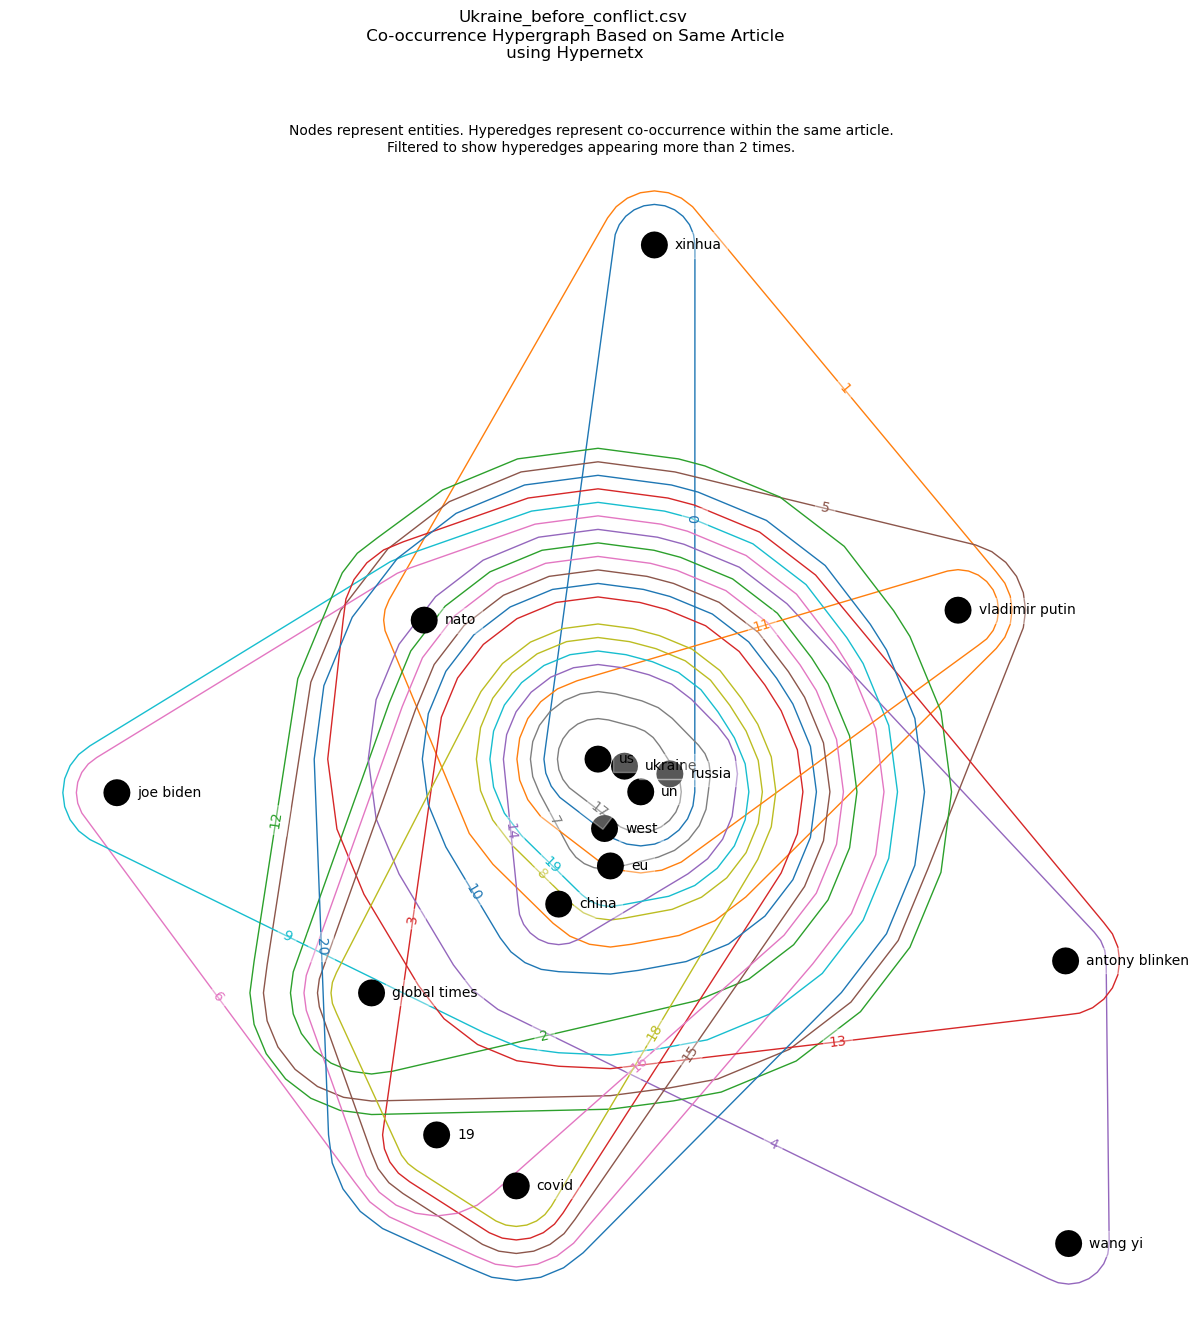

In [209]:
H = hnx.Hypergraph(filtered_hyperedges)

plt.figure(figsize=(15, 15))
hnx.draw(H, with_node_labels=True, with_edge_labels=True)
plt.suptitle("Ukraine_before_conflict.csv\n Co-occurrence Hypergraph Based on Same Article\n using Hypernetx")
plt.title("Nodes represent entities. Hyperedges represent co-occurrence within the same article.\nFiltered to show hyperedges appearing more than 2 times.", fontsize=10)
plt.show()